In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_w2v.csv')

health_df = pd.read_csv('/content/drive/MyDrive/BIO/health_articles.csv')

In [ ]:
health_df.head(10)

,Index,Author,Date.published,Category,Section,Url,Headline,Description,Keywords,Second.headline,Article.text
0,30,"Jen Christensen and Deidre McPhillips, CNN",2022-03-20 17:33:47,health,health,https://www.cnn.com/2022/03/20/health/johnson-...,Johnson & Johnson's Covid-19 vaccine worked be...,The US public and even some health experts may...,"health, Johnson & Johnson's Covid-19 vaccine w...",'Reassuring' data suggests Johnson & Johnson v...,(CNN)The US public and even some health exper...
1,31,"Jen Christensen, CNN",2022-03-19 07:30:11,health,health,https://www.cnn.com/2022/03/19/health/covid-19...,Where the US stands on Covid-19 vaccines for c...,A month after the US Food and Drug Administrat...,"health, Where the US stands on Covid-19 vaccin...",Where the US stands on Covid-19 vaccines for c...,(CNN)A month after the US Food and Drug Admin...
2,32,"Tasnim Ahmed, CNN",2022-03-18 22:04:23,health,health,https://www.cnn.com/2022/03/18/health/alcohol-...,Alcohol-related deaths in the US spiked more t...,The number of deaths in the US involving alcoh...,"health, Alcohol-related deaths in the US spike...",Alcohol-related deaths in the US spiked more t...,(CNN)The number of deaths in the US involving...
3,33,"Brenda Goodman and Deidre McPhillips, CNN",2022-03-16 20:13:23,health,health,https://www.cnn.com/2022/03/16/health/key-indi...,Covid US: This key indicator may determine how...,As America casts a wary eye on rising cases ca...,"health, Covid US: This key indicator may deter...",This key indicator may determine how bad a BA....,(CNN)With a new version of the Omicron corona...
4,135,"Harmeet Kaur, CNN",2021-12-09 22:44:34,health,health,https://www.cnn.com/2021/12/09/health/black-fe...,A viral image of a Black fetus is highlighting...,"The image, created by Nigerian medical student...","health, A viral image of a Black fetus is high...",A viral image of a Black fetus is highlighting...,"(CNN)At first glance, the image looks like a ..."
5,142,"Amarachi Orie, CNN",2022-01-13 08:47:04,health,health,https://www.cnn.com/2022/01/13/health/chidiebe...,The creator of the viral Black fetus image wil...,Chidiebere Ibe is a Nigerian medical student w...,"health, The creator of the viral Black fetus i...",The creator of the viral Black fetus image wil...,(CNN)An illustration of a Black fetus in the ...
6,444,Lameck Masina for CNN,2018-09-26 08:59:12,health,health,https://www.cnn.com/2018/09/26/health/malawi-a...,Women are dying from backstreet abortions. But...,Hundreds of women who die every year in Malawi...,"health, Women are dying from backstreet aborti...",Women are dying from backstreet abortions. But...,CNN is committed to covering gender inequality...
7,454,"Nima Elbagir, Lillian Leposo, and Eliza Mackin...",2018-05-24 09:54:10,health,health,https://www.cnn.com/2018/05/24/health/trump-me...,Trump's ban on global abortion funding has led...,US President Donald Trump's international abor...,"health, Trump's ban on global abortion funding...",Trump's ban on global abortion funding has led...,CNN is committed to covering gender inequality...
8,457,"Alexandra Field and Kathy Quiano, CNN",2018-03-06 02:35:39,health,health,https://www.cnn.com/2018/03/05/health/philippi...,16 and trying not to get pregnant - CNN,A new report signals a shift in the Philippine...,"health, 16 and trying not to get pregnant - CNN",16 and trying not to get pregnant,\nEditor's Note: CNN is committed to covering ...
9,463,"Ivana Kottasová, CNN\nVideo by Jenny Marc, CNN",2018-10-11 04:17:38,health,health,https://www.cnn.com/2018/10/11/health/tanzania...,They failed mandatory pregnancy tests at schoo...,It happens twice a year at Arusha Secondary Sc...,"health, They failed mandatory pregnancy tests ...",They failed mandatory pregnancy tests at schoo...,"Arusha, Tanzania — It happens twice a year at..."


In [ ]:
#tokenize the description, there is an error when attempting to tokenize the entire article, will description suffice? or error needs to be fixed
import spacy
nlp = spacy.load("en_core_web_sm")

docs = health_df['Description'].tolist()

def token_filter(token):
    return not (token.is_punct | token.is_space | token.is_stop | len(token.text) <= 4)

filtered_tokens = []
for doc in nlp.pipe(docs):
    tokens = [token.lemma_ for token in doc if token_filter(token)]
    filtered_tokens.append(tokens)


In [ ]:
health_df['Description_token'] = filtered_tokens 

In [ ]:
health_df.head(10)

,Index,Author,Date.published,Category,Section,Url,Headline,Description,Keywords,Second.headline,Article.text,Description_token
0,30,"Jen Christensen and Deidre McPhillips, CNN",2022-03-20 17:33:47,health,health,https://www.cnn.com/2022/03/20/health/johnson-...,Johnson & Johnson's Covid-19 vaccine worked be...,The US public and even some health experts may...,"health, Johnson & Johnson's Covid-19 vaccine w...",'Reassuring' data suggests Johnson & Johnson v...,(CNN)The US public and even some health exper...,"[public, even, some, health, expert, have, und..."
1,31,"Jen Christensen, CNN",2022-03-19 07:30:11,health,health,https://www.cnn.com/2022/03/19/health/covid-19...,Where the US stands on Covid-19 vaccines for c...,A month after the US Food and Drug Administrat...,"health, Where the US stands on Covid-19 vaccin...",Where the US stands on Covid-19 vaccines for c...,(CNN)A month after the US Food and Drug Admin...,"[month, after, Administration, delay, step, to..."
2,32,"Tasnim Ahmed, CNN",2022-03-18 22:04:23,health,health,https://www.cnn.com/2022/03/18/health/alcohol-...,Alcohol-related deaths in the US spiked more t...,The number of deaths in the US involving alcoh...,"health, Alcohol-related deaths in the US spike...",Alcohol-related deaths in the US spiked more t...,(CNN)The number of deaths in the US involving...,"[number, death, involve, alcohol, jump, betwee..."
3,33,"Brenda Goodman and Deidre McPhillips, CNN",2022-03-16 20:13:23,health,health,https://www.cnn.com/2022/03/16/health/key-indi...,Covid US: This key indicator may determine how...,As America casts a wary eye on rising cases ca...,"health, Covid US: This key indicator may deter...",This key indicator may determine how bad a BA....,(CNN)With a new version of the Omicron corona...,"[America, cast, rise, case, cause, subvariant,..."
4,135,"Harmeet Kaur, CNN",2021-12-09 22:44:34,health,health,https://www.cnn.com/2021/12/09/health/black-fe...,A viral image of a Black fetus is highlighting...,"The image, created by Nigerian medical student...","health, A viral image of a Black fetus is high...",A viral image of a Black fetus is highlighting...,"(CNN)At first glance, the image looks like a ...","[image, create, nigerian, medical, student, il..."
5,142,"Amarachi Orie, CNN",2022-01-13 08:47:04,health,health,https://www.cnn.com/2022/01/13/health/chidiebe...,The creator of the viral Black fetus image wil...,Chidiebere Ibe is a Nigerian medical student w...,"health, The creator of the viral Black fetus i...",The creator of the viral Black fetus image wil...,(CNN)An illustration of a Black fetus in the ...,"[Chidiebere, nigerian, medical, student, want,..."
6,444,Lameck Masina for CNN,2018-09-26 08:59:12,health,health,https://www.cnn.com/2018/09/26/health/malawi-a...,Women are dying from backstreet abortions. But...,Hundreds of women who die every year in Malawi...,"health, Women are dying from backstreet aborti...",Women are dying from backstreet abortions. But...,CNN is committed to covering gender inequality...,"[hundred, woman, every, Malawi, result, govern..."
7,454,"Nima Elbagir, Lillian Leposo, and Eliza Mackin...",2018-05-24 09:54:10,health,health,https://www.cnn.com/2018/05/24/health/trump-me...,Trump's ban on global abortion funding has led...,US President Donald Trump's international abor...,"health, Trump's ban on global abortion funding...",Trump's ban on global abortion funding has led...,CNN is committed to covering gender inequality...,"[President, Donald, Trump, international, abor..."
8,457,"Alexandra Field and Kathy Quiano, CNN",2018-03-06 02:35:39,health,health,https://www.cnn.com/2018/03/05/health/philippi...,16 and trying not to get pregnant - CNN,A new report signals a shift in the Philippine...,"health, 16 and trying not to get pregnant - CNN",16 and trying not to get pregnant,\nEditor's Note: CNN is committed to covering ...,"[report, signal, shift, Philippines, soar, pre..."
9,463,"Ivana Kottasová, CNN\nVideo by Jenny Marc, CNN",2018-10-11 04:17:38

In [ ]:
#!pip install scispacy
#import scispacy
import spacy 
nlp = spacy.load("en_core_web_sm")

docs2 = health_df['Article.text'].tolist()

def token_filter(token):
    return not (token.is_punct | token.is_space | token.is_stop | len(token.text) <= 4)

filtered_tokens2 = []
for doc in nlp.pipe(docs2):
    tokens = [token.lemma_ for token in doc if token_filter(token)]
    filtered_tokens2.append(tokens)


In [ ]:
health_df['Article_token'] = filtered_tokens2 
health_df['Article_text'] = health_df['Article.text']

In [ ]:
health_df.head(10)

,Index,Author,Date.published,Category,Section,Url,Headline,Description,Keywords,Second.headline,Article.text,Description_token,Article_token,Article_text
0,30,"Jen Christensen and Deidre McPhillips, CNN",2022-03-20 17:33:47,health,health,https://www.cnn.com/2022/03/20/health/johnson-...,Johnson & Johnson's Covid-19 vaccine worked be...,The US public and even some health experts may...,"health, Johnson & Johnson's Covid-19 vaccine w...",'Reassuring' data suggests Johnson & Johnson v...,(CNN)The US public and even some health exper...,"[public, even, some, health, expert, have, und...","[CNN)The, public, even, some, health, expert, ...",(CNN)The US public and even some health exper...
1,31,"Jen Christensen, CNN",2022-03-19 07:30:11,health,health,https://www.cnn.com/2022/03/19/health/covid-19...,Where the US stands on Covid-19 vaccines for c...,A month after the US Food and Drug Administrat...,"health, Where the US stands on Covid-19 vaccin...",Where the US stands on Covid-19 vaccines for c...,(CNN)A month after the US Food and Drug Admin...,"[month, after, Administration, delay, step, to...","[cnn)a, month, after, Administration, delay, s...",(CNN)A month after the US Food and Drug Admin...
2,32,"Tasnim Ahmed, CNN",2022-03-18 22:04:23,health,health,https://www.cnn.com/2022/03/18/health/alcohol-...,Alcohol-related deaths in the US spiked more t...,The number of deaths in the US involving alcoh...,"health, Alcohol-related deaths in the US spike...",Alcohol-related deaths in the US spiked more t...,(CNN)The number of deaths in the US involving...,"[number, death, involve, alcohol, jump, betwee...","[cnn)the, number, death, involve, alcohol, jum...",(CNN)The number of deaths in the US involving...
3,33,"Brenda Goodman and Deidre McPhillips, CNN",2022-03-16 20:13:23,health,health,https://www.cnn.com/2022/03/16/health/key-indi...,Covid US: This key indicator may determine how...,As America casts a wary eye on rising cases ca...,"health, Covid US: This key indicator may deter...",This key indicator may determine how bad a BA....,(CNN)With a new version of the Omicron corona...,"[America, cast, rise, case, cause, subvariant,...","[cnn)with, version, Omicron, coronavirus, vari...",(CNN)With a new version of the Omicron corona...
4,135,"Harmeet Kaur, CNN",2021-12-09 22:44:34,health,health,https://www.cnn.com/2021/12/09/health/black-fe...,A viral image of a Black fetus is highlighting...,"The image, created by Nigerian medical student...","health, A viral image of a Black fetus is high...",A viral image of a Black fetus is highlighting...,"(CNN)At first glance, the image looks like a ...","[image, create, nigerian, medical, student, il...","[CNN)At, first, glance, image, look, standard,...","(CNN)At first glance, the image looks like a ..."
5,142,"Amarachi Orie, CNN",2022-01-13 08:47:04,health,health,https://www.cnn.com/2022/01/13/health/chidiebe...,The creator of the viral Black fetus image wil...,Chidiebere Ibe is a Nigerian medical student w...,"health, The creator of the viral Black fetus i...",The creator of the viral Black fetus image wil...,(CNN)An illustration of a Black fetus in the ...,"[Chidiebere, nigerian, medical, student, want,...","[cnn)an, illustration, black, fetus, viral, la...",(CNN)An illustration of a Black fetus in the ...
6,444,Lameck Masina for CNN,2018-09-26 08:59:12,health,health,https://www.cnn.com/2018/09/26/health/malawi-a...,Women are dying from backstreet abortions. But...,Hundreds of women who die every year in Malawi...,"health, Women are dying from backstreet aborti...",Women are dying from backstreet abortions. But...,CNN is committed to covering gender inequality...,"[hundred, woman, every, Malawi, result, govern...","[commit, cover, gender, inequality, wherever, ...",CNN is committed to covering gender inequality...
7,454,"Nima Elbagir, Lillian Leposo, and Eliza Mackin...",2018-05-24 09:54:10,health,health,https://www.cnn.com/2018/05/24/health/trump-me...,Trump's ban on global abortion funding has led.

In [ ]:
health_df.to_pickle('/content/drive/MyDrive/BIO/health_pickle')

In [ ]:

op2017 = pd.read_csv('/content/drive/MyDrive/BIO/op_articles_2017.csv')

In [ ]:
import nltk
nltk.download()
from nltk.corpus import stopwords


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all corpus
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to 

In [ ]:
from nltk.corpus import stopwords


In [ ]:
op2017.rename(columns = {'Article.text':'text'}, inplace = True)
op2017.head(10)

,Author,Date.published,Category,Section,Url,Headline,Description,Keywords,Second.headline,text,index
0,"Jessica Ravitz, CNN",2017-05-12 08:26:16,health,health,https://www.cnn.com/2017/05/12/health/soundtra...,Honoring the soundtrack of my mother's life - CNN,"As my mother lay dying last September, we surr...","health, Honoring the soundtrack of my mother's...",Honoring the soundtrack of my mother's life,"(CNN)As my mother lay dying last fall, we sur...",5
1,CNN Editorial Research,2017-09-18 16:27:25,health,health,https://www.cnn.com/2017/09/18/health/opioid-c...,Opioid Crisis Fast Facts - CNN,Read CNN's Fast Facts about the opioid crisis ...,"health, Opioid Crisis Fast Facts - CNN",Opioid Crisis Fast Facts,(CNN)Here's a look at the opioid crisis. Expe...,7
2,"Story by Wayne Drash, CNN\nVideo by Madeleine ...",2017-05-05 07:20:37,health,health,https://www.cnn.com/2017/05/05/health/opioid-d...,Stopping the opioid crisis in the womb - CNN,Dr. Craig Towers at The University of Tennesse...,"health, Stopping the opioid crisis in the womb...",Stopping the opioid crisis in the womb,Story highlightsA pregnant woman hooked on opi...,8
3,"Jessica Ravitz and Gena Somra, CNN",2017-10-26 16:58:10,health,health,https://www.cnn.com/2017/10/26/health/heroin-a...,'This is skid row': What two current heroin ad...,We often hear about drug users who have won or...,"health, 'This is skid row': What two current h...",'This is skid row': What two current heroin ad...,Story highlightsTwo heroin addicts talk straig...,18
4,"Ed Lavandera and Jeremy Harlan, CNN",2017-12-01 13:32:55,health,health,https://www.cnn.com/2017/12/01/health/police-o...,Police officer adopts homeless mother's opioid...,When Albuquerque officer Ryan Holets responded...,"health, Police officer adopts homeless mother'...",Police officer adopts homeless mother's opioid...,"Albuquerque, New Mexico (CNN)Police officers w...",20
5,"Blake Ellis and Melanie Hicken, CNN Investigates",2017-12-05 00:39:10,health,health,https://www.cnn.com/2017/12/04/health/nuedexta...,Drugmaker paid doctors with problem records to...,CNN identified a dozen doctors paid by Avanir ...,"health, Drugmaker paid doctors with problem re...",Drugmaker paid doctors with problem records to...,(CNN)One physician had his prescription pad t...,22
6,"Christina Manduley and Kimberly Berryman, CNN",2017-09-19 01:07:17,health,health,https://www.cnn.com/2017/09/18/health/opioid-c...,The opioid crisis took this 8-year-old's fathe...,It all started with pain killers after a denti...,"health, The opioid crisis took this 8-year-old...",The opioid crisis took this 8-year-old's fathe...,Story highlightsOhio has seen an 11% increase ...,27


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px


In [ ]:
stopwords = set(stopwords.words('english'))
stopwords.update(["br","href"])
textt = " ".join(review for review in op2017.text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

AttributeError: ignored

In [ ]:
#stopwords = set(stopwords.words('english'))
stopwords.update(["br","href","said","say","CNN","Jessica","says","Stephanie"])
textt = " ".join(review for review in op2017.text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
!pip install wordcloud
import wordcloud
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

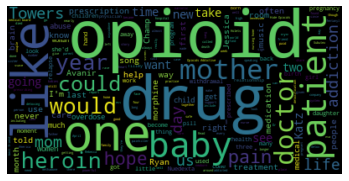

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [ ]:
#for years 2011 to 2015 
op201115 = pd.read_csv('/content/drive/MyDrive/BIO/op_articles_2011_to_2014.csv')


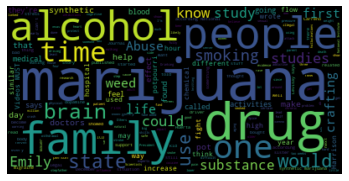

In [ ]:
stopwords.update(["br","href","said","say","CNN","Emily","Bryant","even","also"])
textt = " ".join(review for review in op201115.text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()



In [ ]:
#for year 2016
op2016 = pd.read_csv('/content/drive/MyDrive/BIO/op_articles_2016.csv')


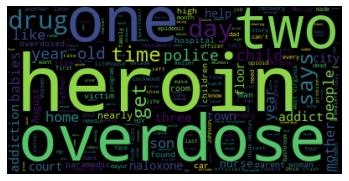

In [ ]:
stopwords.update(["br","href","said","say","CNN","Huntington","McClure","Photos","Caption"])
textt = " ".join(review for review in op2016.text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()



In [ ]:
#for year 2018
op2018 = pd.read_csv('/content/drive/MyDrive/BIO/op_articles_2018.csv')


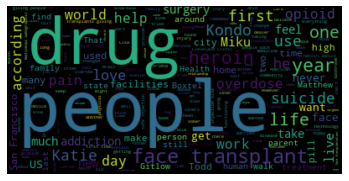

In [ ]:
stopwords.update(["br","href","said","say","CNN","Katie","could","would","like","Rebecca"])
textt = " ".join(review for review in op2018.text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()



In [ ]:
#for year 2019
op2019 = pd.read_csv('/content/drive/MyDrive/BIO/op_articles_2019.csv')


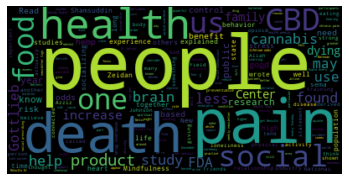

In [ ]:
stopwords.update(["br","href","said","say","CNN","Rumi","according","among"])
textt = " ".join(review for review in op2019.text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

